PREGUNTA 5

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25092\1247421000.py:72: RuntimeWarning: invalid value encountered in sqrt
  magnitud = np.sqrt(sobelx*2 + sobely*2)


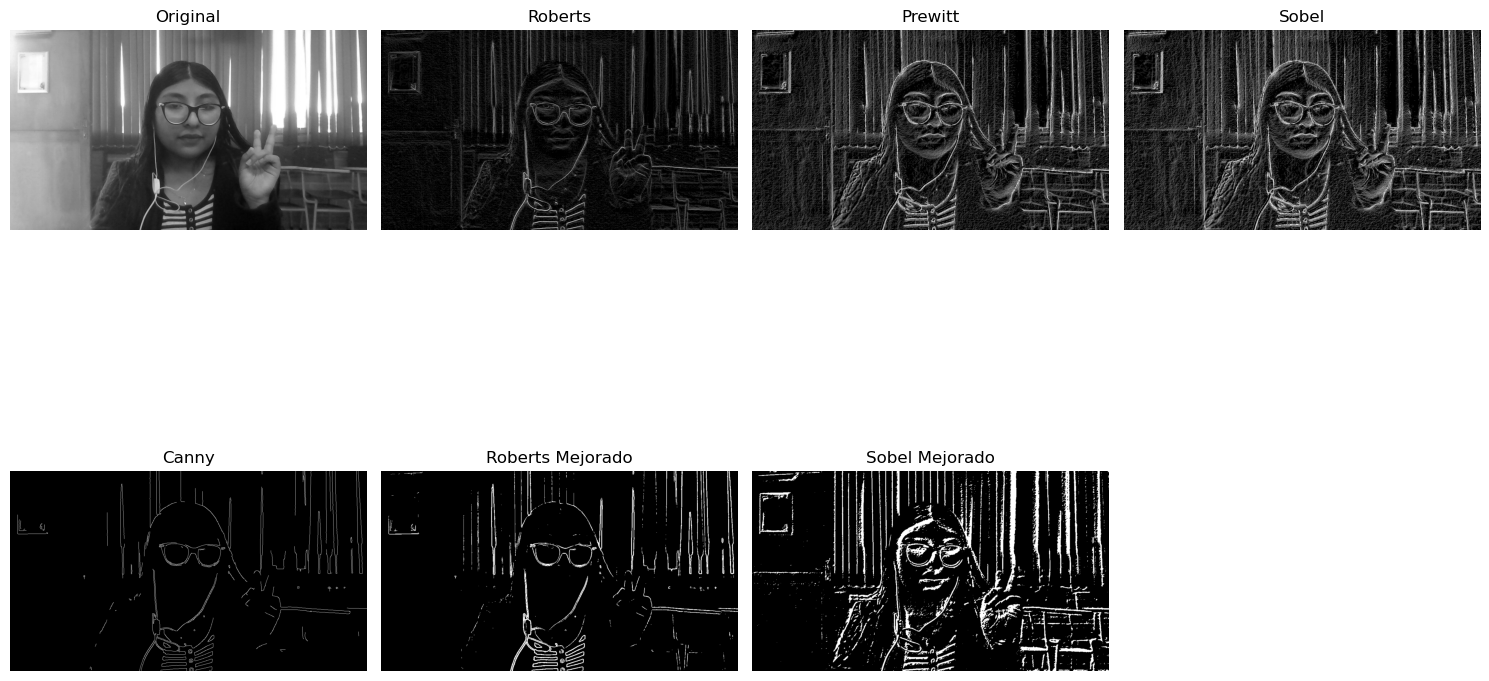

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('yooooo.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Filtro Roberts clásico
robertsx = np.array([[-1, 0], [0, 1]])
robertsy = np.array([[0, -1], [1, 0]])

img_robx = cv2.filter2D(img_gray, -1, robertsx)
img_roby = cv2.filter2D(img_gray, -1, robertsy)
rob_gMagnitud = np.sqrt(img_robx*2 + img_roby*2)
rob_gMagnitud = np.uint8(rob_gMagnitud)


prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

img_prewx = cv2.filter2D(img_gray, -1, prewittx)
img_prewy = cv2.filter2D(img_gray, -1, prewitty)
prew_mag = np.sqrt(img_prewx*2 + img_prewy*2)
prew_mag = np.uint8(prew_mag)


sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

sobx_imge = cv2.filter2D(img_gray, -1, sobelx)
soby_imge = cv2.filter2D(img_gray, -1, sobely)
sobel_grad = np.sqrt(sobx_imge*2 + soby_imge*2)
sobel_grad = np.uint8(sobel_grad)


# Filtro Canny

canny = cv2.Canny(img_gray, 100, 200)


# Roberts mejorado

def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)

    kernelx = np.array([[2, 0], [0, -2]], dtype=np.float32)
    kernely = np.array([[0, 2], [-2, 0]], dtype=np.float32)

    robx = cv2.filter2D(suavizado, cv2.CV_64F, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_64F, kernely)

    roberts = cv2.addWeighted(np.abs(robx), 0.7, np.abs(roby), 0.7, 0)
    _, bordes = cv2.threshold(np.uint8(roberts), 30, 255, cv2.THRESH_BINARY)
    return bordes

# Sobel mejorado

def sobel_mejorado(imagen, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)

    magnitud = np.sqrt(sobelx*2 + sobely*2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    return bordes

roberts_better = roberts_mejorado(img)
sobel_better = sobel_mejorado(img)

titles = ['Original', 'Roberts', 'Prewitt', 'Sobel', 'Canny', 'Roberts Mejorado', 'Sobel Mejorado']
images = [img_gray, rob_gMagnitud, prew_mag, sobel_grad, canny, roberts_better, sobel_better]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

EXPLICACIÓN TÉCNICAS DE BORDES
-Tenemos básicamente 4 técnicas de detección de bordes. Cada una posee una manera distinta de detectar los bordes. Sin embargo, le principal diferencia esta en que tenemos distintos kernels que se utilizan en cada método. El mejor de todos los métodos es canny y viene integrado en la liberia de cv2. Las versiones mejoradas de los filtros ROBERTS, SOBEL Y PREWITT APLICAN un difuminado gaussiano antes de aplicar los kernels para detectar los bordes.

PREGUNTA 1

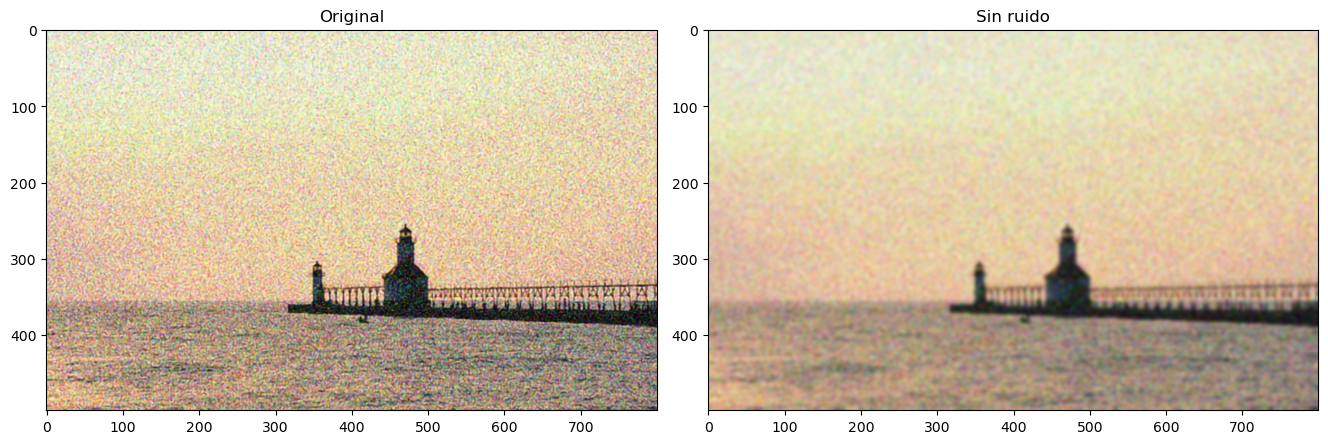

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('ruido.jpg')
imagenn = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
kernel = np.ones((5, 5), np.float32) / 25
borrosa = cv2.filter2D(imagenn, -1, kernel)
sinruido=cv2.GaussianBlur(borrosa, (9,9), 0)
plt.figure(figsize=(20, 20))


plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(imagenn)

plt.subplot(1, 3, 2)
plt.title('Sin ruido')
plt.imshow(sinruido)


plt.tight_layout()
plt.show()

PREGUNTA 6

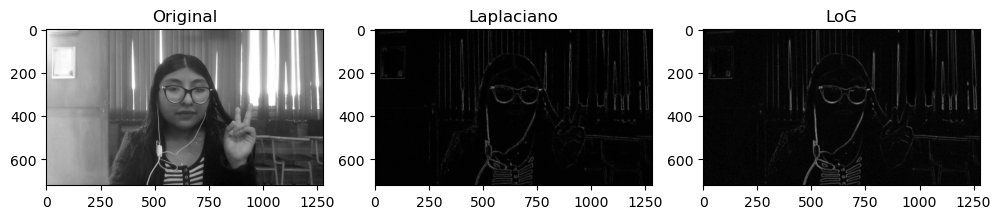

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
img = cv2.imread('yooooo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Laplaciano
lap = cv2.Laplacian(gray, cv2.CV_64F)

# Laplaciano del Gaussiano
gauss = cv2.GaussianBlur(gray, (5, 5), 0)
log = cv2.Laplacian(gauss, cv2.CV_64F)


plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Laplaciano')
plt.imshow(np.abs(lap), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('LoG')
plt.imshow(np.abs(log), cmap='gray')

plt.tight_layout()
plt.show()


PREGUNTA 4

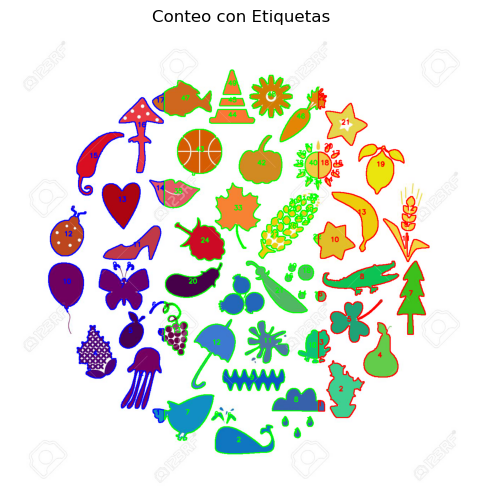


🔍 Conteo exacto por color:
blue: 17
Green: 49
red: 22


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_objetos_por_columna(img, min_area=100):
    alto, ancho = img.shape[:2]
    num_colores = 3
    ancho_columna = ancho // num_colores
    nombres_colores = ['blue', 'Green', 'red']
    colores_rgb = [(255,0,0), (0,255,0), (0,0,255)]

    resultado_conteo = {}
    imagen_marcada = img.copy()

    for i in range(num_colores):
        x_ini = i * ancho_columna
        x_fin = (i + 1) * ancho_columna

        subimg = img[:, x_ini:x_fin]
        gris = cv2.cvtColor(subimg, cv2.COLOR_BGR2GRAY)
        _, binaria = cv2.threshold(gris, 240, 255, cv2.THRESH_BINARY_INV)

        # Morfología para eliminar ruido y cerrar huecos
        kernel = np.ones((3,3), np.uint8)
        binaria = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel)
        binaria = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel)

        contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        objetos_validos = [c for c in contornos if cv2.contourArea(c) > min_area]

        # Dibujar contornos sobre la imagen original
        for j, c in enumerate(objetos_validos):
            c_shifted = c + np.array([[[x_ini, 0]]])
            color = colores_rgb[i]
            cv2.drawContours(imagen_marcada, [c_shifted], -1, color, 2)
            # Etiquetar con número
            M = cv2.moments(c)
            if M['m00'] != 0:
                cx = int(M['m10'] / M['m00']) + x_ini
                cy = int(M['m01'] / M['m00'])
                cv2.putText(imagen_marcada, str(j+1), (cx-10, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        resultado_conteo[nombres_colores[i]] = len(objetos_validos)

    return resultado_conteo, imagen_marcada

# Cargar imagen
imagen = cv2.imread('elementos.jpg')

# Procesar
conteos, imagen_resultado = contar_objetos_por_columna(imagen)

# Mostrar imagen con marcas
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
plt.title("Conteo con Etiquetas")
plt.axis('off')
plt.show()

# Mostrar resultados
print("\n🔍 Conteo exacto por color:")
for color, cant in conteos.items():
    print(f"{color}: {cant}")


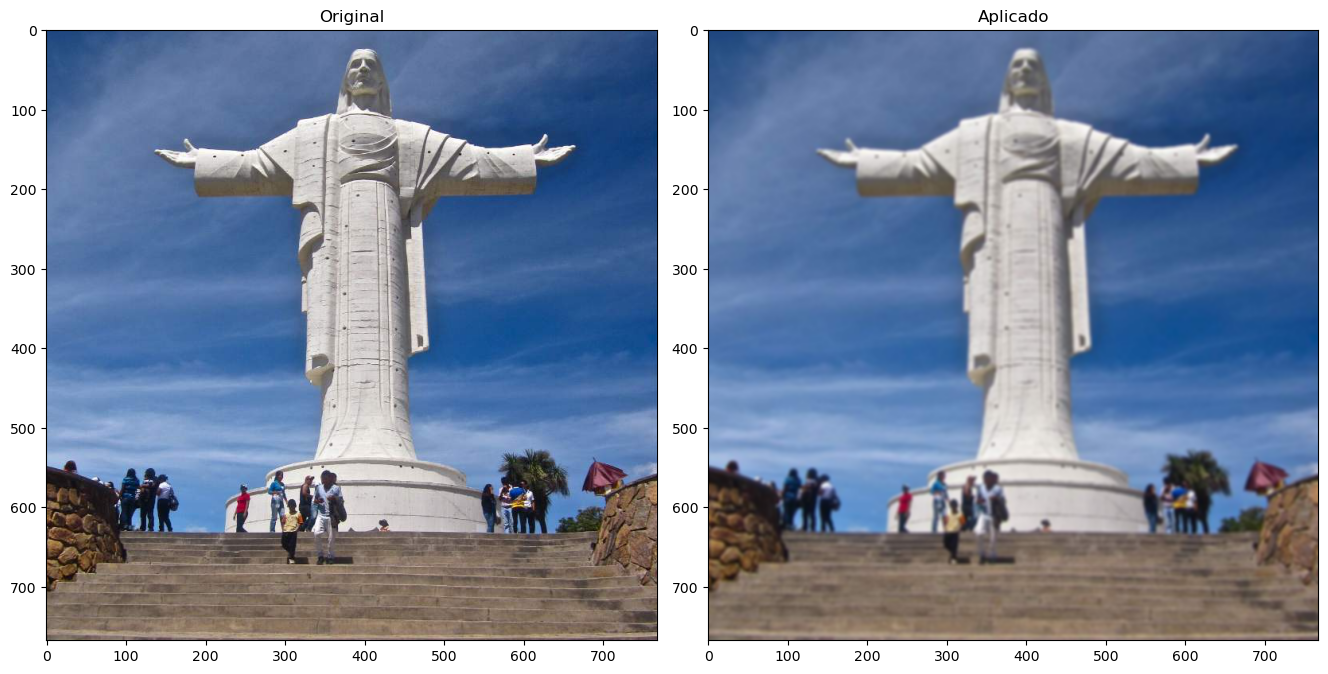

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('cristo.jpg')
imagenn = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
kernel = np.ones((5, 5), np.float32) / 25
borrosa = cv2.filter2D(imagenn, -1, kernel)
final=cv2.GaussianBlur(borrosa, (5,5), 0)
plt.figure(figsize=(20, 20))


plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(imagenn)

plt.subplot(1, 3, 2)
plt.title('Aplicado')
plt.imshow(final)


plt.tight_layout()
plt.show()